In [5]:
import pandas as pd
data = pd.read_excel('merge.xlsx')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [6]:
#匯入套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#LogisticRegression
from sklearn.metrics import classification_report,mean_absolute_error,mean_squared_error,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import random

In [7]:
#設定xy
x=data.iloc[:,:12]
y=data["wine"]
# x
# y

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=42)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1916,6.6,0.240,0.35,7.70,0.031,36.0,135.0,0.99380,3.19,0.37,10.5,5
947,8.3,0.280,0.48,2.10,0.093,6.0,12.0,0.99408,3.26,0.62,12.4,7
877,7.7,0.715,0.01,2.10,0.064,31.0,43.0,0.99371,3.41,0.57,11.8,6
2927,5.2,0.370,0.33,1.20,0.028,13.0,81.0,0.99020,3.37,0.38,11.7,6
6063,6.6,0.260,0.56,15.40,0.053,32.0,141.0,0.99810,3.11,0.49,9.3,5
...,...,...,...,...,...,...,...,...,...,...,...,...
3772,7.6,0.320,0.58,16.75,0.050,43.0,163.0,0.99990,3.15,0.54,9.2,5
5191,5.6,0.280,0.27,3.90,0.043,52.0,158.0,0.99202,3.35,0.44,10.7,7
5226,6.4,0.370,0.20,5.60,0.117,61.0,183.0,0.99459,3.24,0.43,9.5,5
5390,6.5,0.260,0.50,8.00,0.051,46.0,197.0,0.99536,3.18,0.47,9.5,5


In [19]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train,y_train)
preds_qda=qda.predict(x_test)

In [20]:
print(classification_report(y_test,preds_qda,target_namesD=["red","white"]))

              precision    recall  f1-score   support

         red       0.95      0.98      0.97       341
       white       0.99      0.98      0.99       959

    accuracy                           0.98      1300
   macro avg       0.97      0.98      0.98      1300
weighted avg       0.98      0.98      0.98      1300



In [22]:
print(qda.score(x_train,y_train))
print(accuracy_score(y_test,preds_qda))

0.9876852030017318
0.9815384615384616


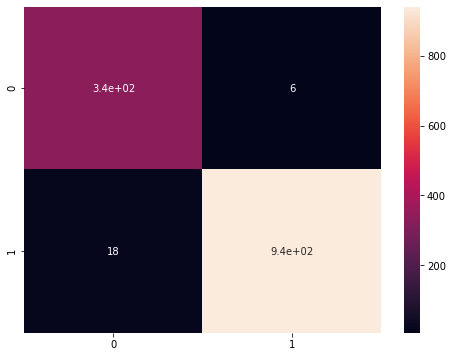

In [24]:
cm=confusion_matrix(y_test,preds_qda)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True)
plt.show()